In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# !pip install rdkit-pypi
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
import rdkit.DataStructs

In [4]:
supplier = rdkit.Chem.SDMolSupplier(
    '/Users/suchanuchpiriyasatit/Documents/Tsinghua/Random Processes/dse_random_walk/data/all.sdf')
molecules = [mol for mol in supplier if mol is not None]
len(molecules)

[13:44:12] Warning: conflicting stereochemistry at atom 7 ignored. by rule 1a.
[13:44:12] Warning: conflicting stereochemistry at atom 7 ignored. by rule 1a.
[13:44:12] ERROR: SGroup SAP line too short: 'M  SAP   1  1  13' on line 240658
[13:44:12] ERROR: moving to the beginning of the next molecule
[13:44:12] Warning: conflicting stereochemistry at atom 0 ignored. by rule 1a.
[13:44:12] Warning: conflicting stereochemistry at atom 0 ignored. by rule 1a.
[13:44:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:44:12] ERROR: Could not sanitize molecule ending on line 339099
[13:44:12] ERROR: Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:44:12] Explicit valence for atom # 35 O, 3, is greater than permitted
[13:44:12] ERROR: Could not sanitize molecule ending on line 345154
[13:44:12] ERROR: Explicit valence for atom # 35 O, 3, is greater than permitted
[13:44:12] Explicit valence for atom # 17 O, 3, is greater than permitted
[13:44:12] ERROR: Could not s

[13:44:13] Explicit valence for atom # 1 N, 4, is greater than permitted
[13:44:13] ERROR: Could not sanitize molecule ending on line 681169
[13:44:13] ERROR: Explicit valence for atom # 1 N, 4, is greater than permitted
[13:44:13] Explicit valence for atom # 6 Be, 4, is greater than permitted
[13:44:13] ERROR: Could not sanitize molecule ending on line 683721
[13:44:13] ERROR: Explicit valence for atom # 6 Be, 4, is greater than permitted
[13:44:13] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[13:44:13] ERROR: Could not sanitize molecule ending on line 684197
[13:44:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[13:44:13] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[13:44:13] ERROR: Could not sanitize molecule ending on line 695085
[13:44:13] ERROR: Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13
[13:44:13] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6 7 8 9 10
[13:44:13] ERROR: Could not sanitize molecule 

6749

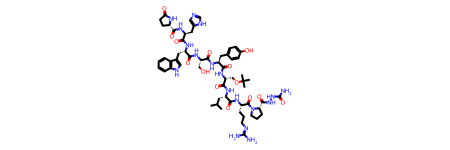

In [5]:
molecules[0]

In [76]:
# Calculate fingerprints
fingerprints = dict()
fingerprints_bitvec = dict()
for mol in molecules:
    drugbank_id = mol.GetProp('DATABASE_ID')
#     fingerprint = rdkit.Chem.AllChem.GetMorganFingerprint(mol, 2)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(
            mol, radius=2, nBits = 1024)
    bitvec = np.array(fingerprint)
    fingerprints_bitvec[drugbank_id] = bitvec
    fingerprints[drugbank_id] = np.nonzero(bitvec)[0]
    


In [7]:
!ls ../semisupervised/data/

adr      citeseer cora     pubmed


In [15]:
data_path = '../semisupervised/data/adr'
df_se = pd.read_csv(os.path.join(data_path, 'drug_se_filtered.csv'))
drug_chem_sim = pd.read_csv(os.path.join(data_path, 'drug_sim_filtered.csv'))
# filter only class with >= 5 samples
cc = df_se.groupby('side_effect_name').count().sort_values('drug')
filtered_se = cc[cc.drug>=10].index
print(df_se.drug.unique().shape, df_se.side_effect_name.unique().shape)
df_se = df_se[df_se.side_effect_name.isin(filtered_se)]
print(df_se.drug.unique().shape, df_se.side_effect_name.unique().shape)

(814,) (5296,)
(814,) (1479,)


In [16]:
len(set(df_se.drug.unique()).intersection(set(fingerprints.keys())))

813

In [17]:
filtered_drugs = set(
    df_se.drug.unique()).intersection(set(fingerprints.keys()))

In [27]:
to_remove_drugs = set(
    df_se.drug.unique()).difference(set(fingerprints.keys()))
to_remove_drugs
cols = drug_chem_sim.columns.tolist()
to_remove_idx = [cols.index(drug) for drug in to_remove_drugs]
to_remove_idx

[38]

In [29]:
drug_chem_sim.drop(to_remove_drugs, axis=1)

,DB00698,DB00726,DB00501,DB00586,DB01112,DB00543,DB00952,DB00341,DB00710,DB00904,...,DB00828,DB00203,DB00708,DB01032,DB00335,DB00567,DB00529,DB00609,DB01265,DB01119
0,1.000000,0.126374,0.150538,0.143646,0.207602,0.171806,0.133333,0.172973,0.078212,0.146718,...,0.054945,0.148148,0.167442,0.143617,0.117647,0.176871,0.026316,0.124294,0.145038,0.132701
1,0.126374,1.000000,0.115385,0.452632,0.106109,0.201220,0.261194,0.233333,0.117117,0.206349,...,0.069565,0.163763,0.328467,0.216667,0.272727,0.144628,0.011628,0.214953,0.089623,0.223022
2,0.150538,0.115385,1.000000,0.097015,0.086154,0.144444,0.163399,0.097902,0.099174,0.139423,...,0.064516,0.120915,0.110465,0.131387,0.103704,0.104247,0.043478,0.148760,0.111111,0.177632
3,0.143646,0.452632,0.097015,1.000000,0.127036,0.220859,0.187500,0.339286,0.105263,0.173469,...,0.106195,0.138983,0.268966,0.223140,0.290909,0.172269,0.059524,0.200000,0.104265,0.246377
4,0.207602,0.106109,0.086154,0.127036,1.000000,0.157143,0.138973,0.163399,0.081433,0.168901,...,0.078176,0.212528,0.200000,0.127389,0.152318,0.672414,0.027875,0.104575,0.229692,0.148936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0.176871,0.144628,0.104247,0.172269,0.672414,0.185965,0.183206,0.224576,0.099585,0.186495,...,0.100000,0.202532,0.223485,0.166667,0.206009,1.000000,0.036364,0.133891,0.215686,0.151852
810,0.026316,0.011628,0.043478,0.059524,0.027875,0.027778,0.043478,0.053191,0.229508,0.028736,...,0.233333,0.043956,0.047244,0.114943,0.045977,0.036364,1.000000,0.025316,0.034091,0.043103
811,0.124294,0.214953,0.148760,0.200000,0.104575,0.116959,0.263566,0.213675,0.113208,0.240223,...,0.093458,0.142857,0.157895,0.166667,0.196429,0.133891,0.025316,1.000000,0.086957,0.115646
812,0.145038,0.089623,0.111111,0.104265,0.229692,0.123077,0.152838,0.140845,0.140625,0.133333,...,0.123711,0.162602,0.193966,0.126168,0.157635,0.215686,0.034091,0.086957,1.000000,0.142241


### Filter only drugs with chemical structures

In [31]:
df_se = df_se[df_se.drug.isin(filtered_drugs)]
drug_chem_sim = drug_chem_sim.drop(to_remove_drugs, axis=1)
drug_chem_sim = drug_chem_sim.drop(to_remove_idx, axis=0)

In [37]:
np.sum(drug_chem_sim.to_numpy().diagonal())

813.0

In [38]:
drug_chem_sim.shape

(813, 813)

## Network

In [39]:
d = drug_chem_sim.to_numpy()
np.fill_diagonal(d, 0)
thres = np.where(d>=0.5, 1, 0)


In [40]:
np.sum(np.sum(thres, axis=1)==0)
# stand-alone node

177

(array([451., 150.,  69.,  61.,  37.,  14.,  12.,   8.,   5.,   6.]),
 array([ 0. ,  4.1,  8.2, 12.3, 16.4, 20.5, 24.6, 28.7, 32.8, 36.9, 41. ]),
 <BarContainer object of 10 artists>)

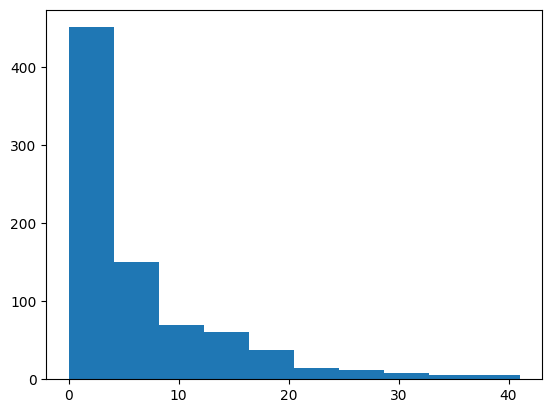

In [41]:
plt.hist(np.sum(thres, axis=1))

In [42]:
with open(os.path.join(data_path, 'net.txt'), 'w') as f:
    for i in range(thres.shape[0]):
        if np.sum(thres[i])==0: # no edges
            f.write(f'{i}\n')
        for j in thres[i].nonzero()[0]:
            f.write(f'{i}\t{j}\t{1}\n')#str(i)+' ' +str(j)+' '+str(A_n[i,j])+'\n')
    


## Labels

In [43]:
stoi = {s: i for i, s in enumerate(drug_chem_sim.columns)}
itos = {i: s for i, s in enumerate(drug_chem_sim.columns)}

In [44]:
poi_drugs = df_se[df_se.side_effect_name=='Shock'].drug.values

In [45]:
with open(os.path.join(data_path, 'label.txt'), 'w') as f:
    for i in range(drug_chem_sim.shape[0]):
        drug = itos[i]
        label = 1 if drug in poi_drugs else 0
        f.write(f'{i}\t{label}\n')
    

In [46]:
# s = df_se.groupby('side_effect_name').count().sort_values('drug')
# s[s.drug>400]

In [47]:
# df_se.groupby('side_effect_name').count().drug.describe()

In [48]:
df_se[df_se.side_effect_name=='Shock'].drug.unique().shape

(409,)

In [49]:
410/drug_chem_sim.columns.shape[0]

0.5043050430504306

## No Features -> Unique array

In [50]:
# 0	19:1.0 81:1.0 146:1.0 315:1.0 774:1.0 877:1.0 1194:1.0 1247:1.0 1274:1.0


In [51]:
with open(os.path.join(data_path, 'blank_feature.txt'), 'w') as f:
    for i in range(drug_chem_sim.shape[0]):
        drug = itos[i]
        label = 1 if drug in poi_drugs else 0
        f.write(f'{i}\t{i}:{1.0}\n')
    

In [52]:
fingerprints['DB00014']

array([   1,    4,   33,   64,   79,   80,   81,   86,   90,   94,  108,
        114,  117,  118,  119,  128,  132,  140,  144,  147,  151,  175,
        188,  193,  213,  222,  231,  242,  283,  289,  301,  310,  314,
        316,  325,  328,  333,  351,  354,  356,  362,  364,  369,  378,
        392,  409,  446,  448,  456,  457,  458,  482,  488,  502,  504,
        508,  511,  531,  549,  551,  573,  578,  579,  583,  592,  624,
        648,  650,  655,  661,  680,  689,  695,  713,  714,  720,  725,
        726,  730,  736,  739,  745,  754,  759,  766,  798,  806,  807,
        823,  835,  837,  841,  849,  855,  857,  867,  882,  887,  892,
        893,  902,  913,  918,  926,  927,  935,  946,  963,  973,  978,
        980,  982,  985,  992, 1019])

## Chemical Features

In [53]:
# 0	19:1.0 81:1.0 146:1.0 315:1.0 774:1.0 877:1.0 1194:1.0 1247:1.0 1274:1.0

with open(os.path.join(data_path, 'chem_feature.txt'), 'w') as f:
    for i in range(drug_chem_sim.shape[0]):
        drug = itos[i]
        nonzero_idx = fingerprints[drug]
        st = [f'{idx}:1.0' for idx in nonzero_idx]
        st = ' '.join(st)
        f.write(f'{i}\t{st}\n')
        

In [55]:
drug_chem_sim.shape

(813, 813)

## Train/Valid/Test Split - 80/10/10

In [70]:
.8*813, .1*813

(650.4000000000001, 81.30000000000001)

In [56]:
with open(os.path.join(data_path, 'train.txt'), 'w') as f:
    for i in range(650):
        f.write(f'{i}\n')
    

In [57]:
with open(os.path.join(data_path, 'dev.txt'), 'w') as f:
    for i in range(650, 650+81):
        f.write(f'{i}\n')
    

In [58]:
with open(os.path.join(data_path, 'test.txt'), 'w') as f:
    for i in range(650+81, drug_chem_sim.shape[0]):
        f.write(f'{i}\n')
    

In [65]:
test_drugs = drug_chem_sim.columns.tolist()[650+81:]
poi = df_se[(df_se.drug.isin(test_drugs))&
            (df_se.side_effect_name=='Shock')]
poi.shape

(38, 2)

In [71]:
(drug_chem_sim.shape[0]-(650+81)+1)

83

In [72]:
# class 1 ratio
38/(drug_chem_sim.shape[0]-(650+81)+1)

0.4578313253012048

In [120]:
s = [64.634,
63.415,
63.415,
63.415,
62.195,
60.976,
60.976,
62.195,
62.195,
60.976,
63.415,
60.976,
62.195,
62.195,
62.195,
60.976,
64.634,
60.976,
62.195,
62.195,
59.756,
62.195,
62.195,
60.976,
63.415,
62.195,
59.756,
60.976,
60.976,
62.195,
62.195,
62.195,
62.195,
64.634,
63.415,
64.634,
63.415,
60.976,
64.634,
58.537,
63.415,
65.854,
60.976,
60.976,
62.195,
62.195,
59.756,
60.976,
62.195,
60.976,
64.634,
60.976,
62.195,
64.634,
62.195,
64.634,
63.415,
63.415,
62.195,
59.756,
62.195,
62.195,
62.195,
62.195,
62.195,
63.415,
60.976,
62.195,
64.634,
62.195,
65.854,
60.976,
62.195,
62.195,
62.195,
60.976,
62.195,
58.537,
62.195,
62.195,
63.415,
60.976,
64.634,
62.195,
60.976,
62.195,
63.415,
60.976,
60.976,
60.976,
60.976,
63.415,
60.976,
62.195,
62.195,
63.415,
62.195,
62.195,
60.976,
60.976,
    ]
np.sum(s)/len(s)

62.195229999999995

In [121]:
s = [60.976,
58.537,
63.415,
63.415,
63.415,
64.634,
58.537,
60.976,
60.976,
60.976,
62.195,
67.073,
62.195,
60.976,
63.415,
58.537,
59.756,
58.537,
64.634,
63.415,
62.195,
62.195,
62.195,
62.195,
67.073,
60.976,
62.195,
64.634,
60.976,
63.415,
62.195,
58.537,
63.415,
56.098,
60.976,
60.976,
63.415,
62.195,
58.537,
63.415,
65.854,
60.976,
60.976,
58.537,
62.195,
60.976,
59.756,
58.537,
58.537,
59.756,
60.976,
65.854,
63.415,
62.195,
64.634,
58.537,
60.976,
64.634,
63.415,
60.976,
59.756,
59.756,
63.415,
59.756,
60.976,
60.976,
62.195,
60.976,
63.415,
60.976,
60.976,
62.195,
63.415,
62.195,
65.854,
65.854,
63.415,
65.854,
60.976,
60.976,
63.415,
60.976,
63.415,
62.195,
59.756,
63.415,
63.415,
63.415,
62.195,
60.976,
63.415,
65.854,
63.415,
59.756,
60.976,
59.756,
58.537,
63.415,
60.976,
62.195,
]
np.sum(s)/len(s)

61.914849999999994

,## RF Baseline

In [114]:
cols = drug_chem_sim.columns.tolist()
poi_drugs = df_se[df_se.side_effect_name=='Shock'].drug.values
X_train = np.array([fingerprints_bitvec[cols[i]] for i in range(650)])
Y_train = [int(itos[i] in poi_drugs)  for i in range(650)]
X_valid = np.array([fingerprints_bitvec[cols[i]] for i in range(650, 650+81)])
Y_valid = [int(itos[i] in poi_drugs)  for i in range(650, 650+81)]
X_test = np.array([fingerprints_bitvec[cols[i]] for i in range(650+81, drug_chem_sim.shape[0])])
Y_test = [int(itos[i] in poi_drugs)  for i in range(650+81, drug_chem_sim.shape[0])]


In [116]:
from sklearn.ensemble import RandomForestClassifier
for i in range(5,20):
    clf = RandomForestClassifier(max_depth=i, min_samples_split=2,random_state=0)
    clf.fit(X_train, Y_train)
    print(clf.score(X_train, Y_train), clf.score(X_valid, Y_valid))
    # print(clf.predict([[0, 0, 0, 0]]))

0.803076923076923 0.5679012345679012
0.8461538461538461 0.5925925925925926
0.8892307692307693 0.5679012345679012
0.9092307692307692 0.5802469135802469
0.9230769230769231 0.6049382716049383
0.936923076923077 0.5925925925925926
0.9569230769230769 0.6049382716049383
0.9584615384615385 0.5555555555555556
0.9692307692307692 0.5802469135802469
0.9661538461538461 0.5679012345679012
0.9692307692307692 0.5925925925925926
0.9753846153846154 0.5555555555555556
0.9784615384615385 0.5432098765432098
0.9753846153846154 0.5925925925925926
0.9846153846153847 0.5925925925925926


In [122]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [123]:
print(clf.score(X_train, Y_train), clf.score(X_valid, Y_valid))

0.9738461538461538 0.5925925925925926


In [117]:
clf = RandomForestClassifier(max_depth=9, min_samples_split=2,random_state=0)
clf.fit(X_train, Y_train)
print(clf.score(X_train, Y_train), clf.score(X_valid, Y_valid))

0.9230769230769231 0.6049382716049383


In [118]:
clf.score(X_test, Y_test)

0.5975609756097561

In [91]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1])

In [86]:
Y_test

[1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [107]:
c = df_se.groupby('side_effect_name').count()
filtered_se = c[c.drug>=5].index
d = df_se[df_se.side_effect_name.isin(filtered_se)].drug.unique()

In [130]:
'Perceptual distortions' in filtered_se

False

In [128]:
df_se[df_se.side_effect_name=='Perceptual distortions'].drug.unique()

array(['DB00790'], dtype=object)

In [132]:
cc = df_se.groupby('side_effect_name').count().sort_values('drug')
filtered_se = c[c.drug>=5].index

In [139]:
cc.shape

(5296, 1)

In [138]:
cc[cc.drug>=5]

,drug
side_effect_name,
Corneal sensitivity decreased,5
Convulsions generalised,5
Radiation pneumonitis,5
Clumsiness,5
Bladder carcinoma,5
...,...
Injection site bruising,5
Male sexual dysfunction,5
Immobile,5


In [112]:
df_se.side_effect_name.unique().shape

(5296,)

In [109]:
d.shape

(814,)

In [110]:
drug_chem_sim.shape

(814, 814)

In [114]:
df_se[df_se.side_effect_name.isin(filtered_se)]

,drug,side_effect_name
1,DB01048,Abdominal discomfort
2,DB01048,Abdominal pain
3,DB01048,Abdominal pain upper
4,DB01048,Abnormal dreams
5,DB01048,Acute coronary syndrome
...,...,...
114048,DB01624,Vulvovaginal dryness
114049,DB01624,Warmth
114050,DB01624,Weight decreased
114051,DB01624,Weight increased
